<a href="https://colab.research.google.com/github/Murugan03/BigMart-Sales-Analysis-of-Product-and-Stores-Features/blob/main/Technocolabs_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technocolabs Mini Project: Bigmart Sales Dataset
# Author: Murugan S

# Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.


![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ5giJqwHM3QPu5r6wyYq-J6OIVmmU2Z-Bs1g&usqp=CAU)


# Loading Packages and Data




In [ ]:
import numpy as np
import pandas as pd


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train_data = pd.read_csv("/content/Train.csv")
test_data = pd.read_csv("/content/Test.csv")

# Preprocessing and Data Analysis

In [ ]:
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
train_data.shape, test_data.shape

((8523, 12), (5681, 11))

# Handling missing values

In [ ]:
print("Train:\n")
print(train_data.isnull().sum(),"\n\n")
print("Test:\n")
print(test_data.isnull().sum())

Train:

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 


Test:

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


There is two columns **Item_Weight** and **Outlet_Size** have missing values so we need to impute them using mean and mode values.

### Let's check length of unique values for `Outlet_Size` and `Item_Weight`:

In [ ]:
print("Outlet_Size:\n", len(train_data['Outlet_Size'].unique()), "\n\n")
print("Item_Weight:\n", len(train_data['Item_Weight'].unique()), "\n\n")

Outlet_Size:
 4 


Item_Weight:
 416 




`**Outlet_Size**` is a categorical column, therefore we will impute missing values with the **mode value** and '*`Item_Weight`*' is numerical so we use **mean** value to impute.

**train data**

In [ ]:
# Calculate the mean of 'Item_Weight'
mean_item_weight = train_data['Item_Weight'].mean()

# Fill null values with the mean value
train_data['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Calculate the mode of 'Outlet_Size'
mode_outlet_size = train_data['Outlet_Size'].mode()[0]

# Fill null values with the mode value
train_data['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [ ]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**test data**

In [ ]:
# Calculate the mean of 'Item_Weight'
mean_item_weight = test_data['Item_Weight'].mean()

# Fill null values with the mean value
test_data['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Calculate the mode of 'Outlet_Size'
mode_outlet_size = test_data['Outlet_Size'].mode()[0]

# Fill null values with the mode value
test_data['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [ ]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now we can see there is no missing values in both train and test data.

# Outlier detection and handling

Here we create the **box plot** to check if there any **outliers** in **numerical columns**.

**train data**

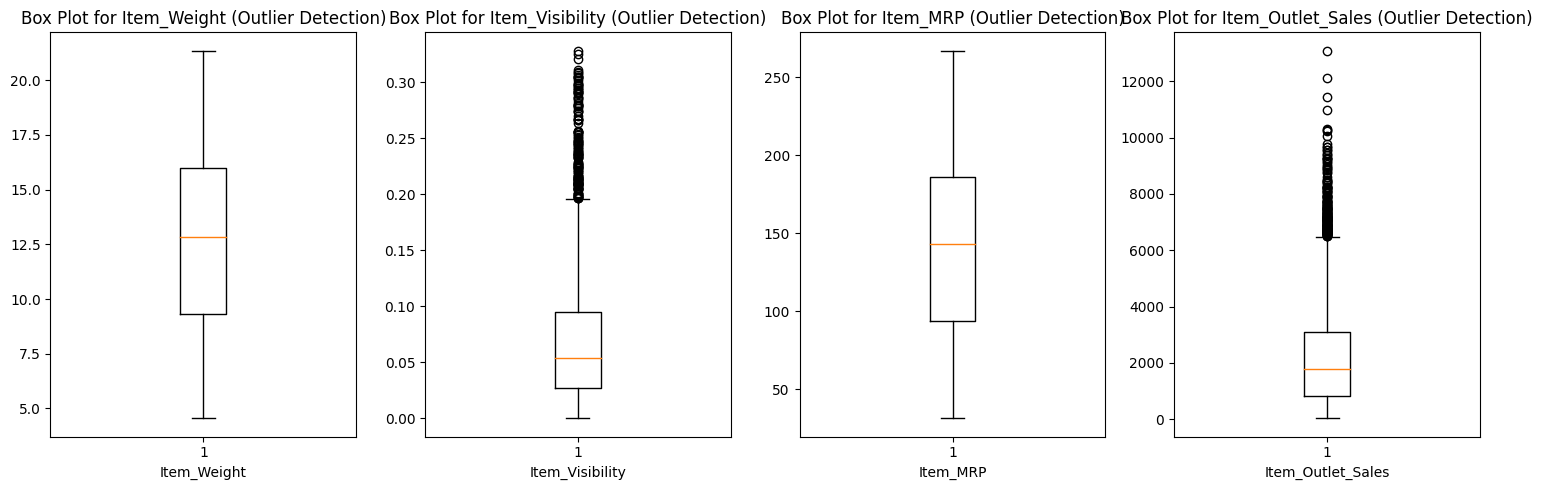

In [ ]:
# Define the features  want to create box plots for
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Loop through each feature and create box plots
for i, feature in enumerate(features):
    axes[i].boxplot(train_data[feature], vert=True)
    axes[i].set_xlabel(feature)
    axes[i].set_title(f'Box Plot for {feature} (Outlier Detection)')

plt.tight_layout()
plt.show()


From the box plot we can see that only two columns '**Item_Visibility**'and '**Item_Outlet_Sales**' have outliers so we need to remove them using  **IQR** and **clip** method

In [ ]:
# Define the two features for outlier detection and removal
features_to_process = ['Item_Visibility', 'Item_Outlet_Sales']

# Loop through each feature
for feature in features_to_process:
    # Calculate the IQR
    Q1 = train_data[feature].quantile(0.25)
    Q3 = train_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with lower or upper bound
    train_data[feature] = train_data[feature].clip(lower=lower_bound, upper=upper_bound)

# Now, train_data contains the outliers replaced with the lower and upper bounds


**test data**

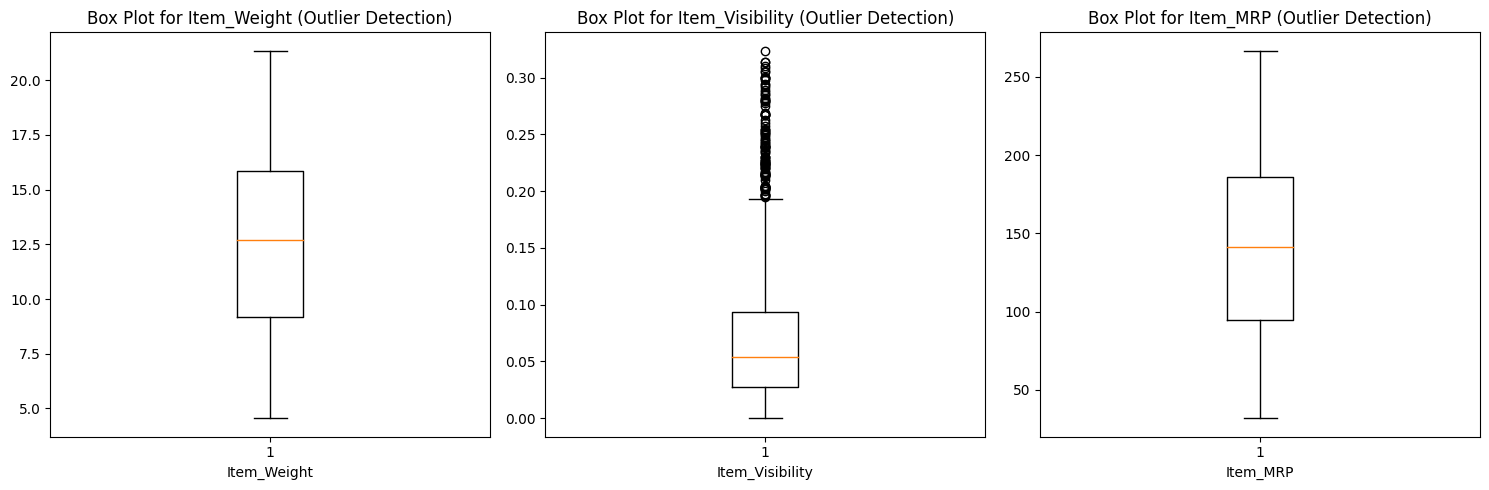

In [ ]:
# Define the features  want to create box plots for
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Loop through each feature and create box plots
for i, feature in enumerate(features):
    axes[i].boxplot(test_data[feature], vert=True)
    axes[i].set_xlabel(feature)
    axes[i].set_title(f'Box Plot for {feature} (Outlier Detection)')

plt.tight_layout()
plt.show()


From the box plot we can see that '**Item_Visibility**' have outliers so we need to remove them using IQR and clip method

In [ ]:
 # Calculate the IQR
Q1 = test_data['Item_Visibility'].quantile(0.25)
Q3 = test_data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

 # Replace outliers with lower or upper bound
test_data['Item_Visibility'] = test_data['Item_Visibility'].clip(lower=lower_bound, upper=upper_bound)

# Now, test_data contains the outliers replaced with the lower and upper bounds

# Data Exploration

split the data to cat and numerical

In [ ]:
#Select numerical columns
numerical_columns = train_data.select_dtypes(include=[np.number])

# Select categorical columns
categorical_columns = train_data.select_dtypes(exclude=[np.number])

In [ ]:
for col in categorical_columns:
  print(train_data[col].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    520

We can see that in **Item_Fat_Content** column there is a repeating values with different name, so we need to correct them.

In [ ]:
# Replace values in the 'Item_Fat_Content' column in train data
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

# Replace values in the 'Item_Fat_Content' column in test data

test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})


In [ ]:
print("train:\n",train_data['Item_Fat_Content'].value_counts())
print("\n")
print("test:\n",test_data['Item_Fat_Content'].value_counts())

train:
 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


test:
 Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [ ]:
#creating our new column for both datasets
train_data['Outlet_Age'], test_data['Outlet_Age']= train_data['Outlet_Establishment_Year'].apply(lambda year: 2013 - year), test_data['Outlet_Establishment_Year'].apply(lambda year: 2013 - year)

# Dropping the Outlet_Establishment_Year column
train_data.drop(['Outlet_Establishment_Year'], inplace = True, axis = 1)
test_data.drop(['Outlet_Establishment_Year'], inplace = True, axis = 1)


In [ ]:
test_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58    20.750000          Low Fat         0.007565  Snack Foods   
1           FDW14     8.300000          Regular         0.038428        Dairy   
2           NCN55    14.600000          Low Fat         0.099575       Others   
3           FDQ58     7.315000          Low Fat         0.015388  Snack Foods   
4           FDY38    12.695633          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0  107.8622            OUT049      Medium               Tier 1   
1   87.3198            OUT017      Medium               Tier 2   
2  241.7538            OUT010      Medium               Tier 3   
3  155.0340            OUT017      Medium               Tier 2   
4  234.2300            OUT027      Medium               Tier 3   

         Outlet_Type  Outlet_Age  
0  Supermarket Type1          14  
1  Supermarket Type1           6  
2      Grocery Store          15  
3  Supermarket Type1           6  
4  Supermarket Type3          28

# Exploratory Data Analysis (eda)

**Univariate** **Analysis**

In [ ]:
#Select numerical columns
numerical_columns = train_data.select_dtypes(include=[np.number])

# Select categorical columns
categorical_columns = train_data.select_dtypes(exclude=[np.number])

numerical_columns

In [ ]:
numerical_columns.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

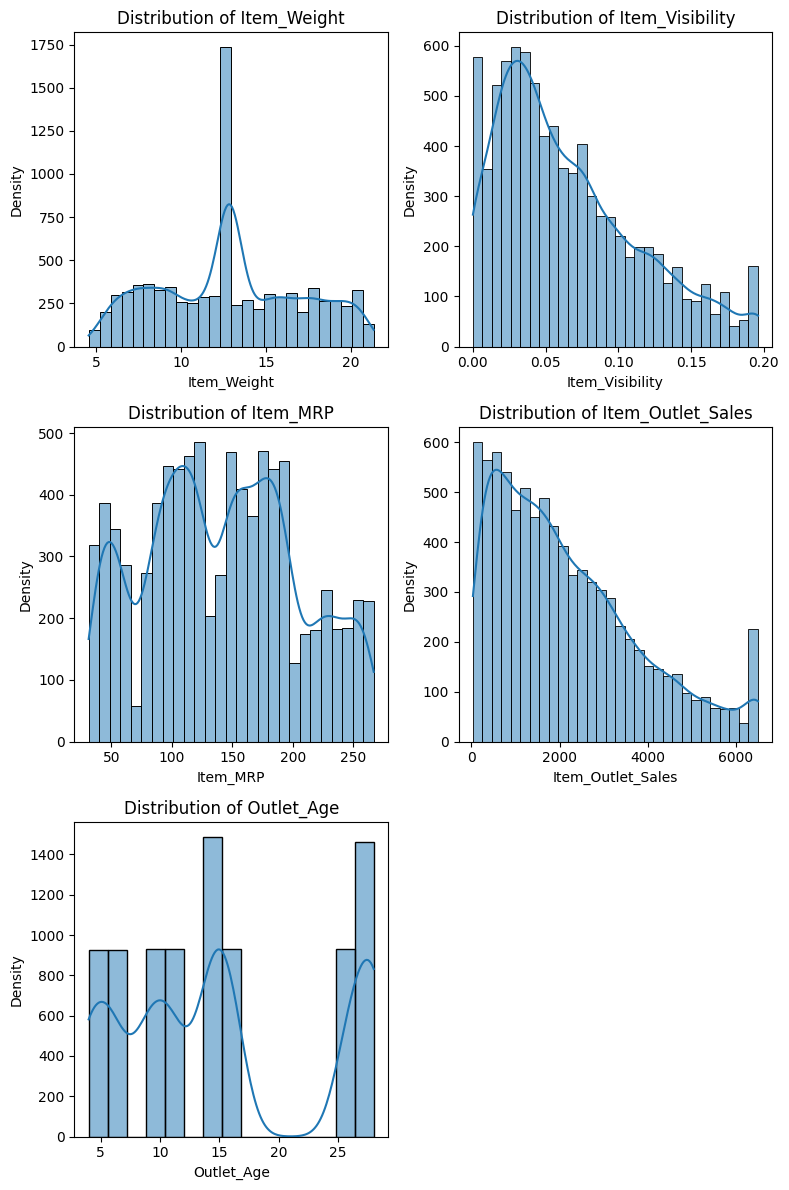

In [ ]:
# Assuming 'numerical_columns' is  DataFrame containing numerical features

# Calculate the number of rows and columns for the subplots grid
num_features = len(numerical_columns.columns)
num_rows = (num_features + 1) // 2  # Two columns per row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical feature and create distribution plots (displots) within subplots
for i, column in enumerate(numerical_columns.columns):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    sns.histplot(numerical_columns[column], kde=True, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {column}')

# If there is an odd number of features, remove the last empty subplot
if num_features % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()


categorical_columns

In [ ]:
categorical_columns.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
categorical_columns = categorical_columns.drop(['Item_Identifier'], axis = 1)
categorical_columns.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

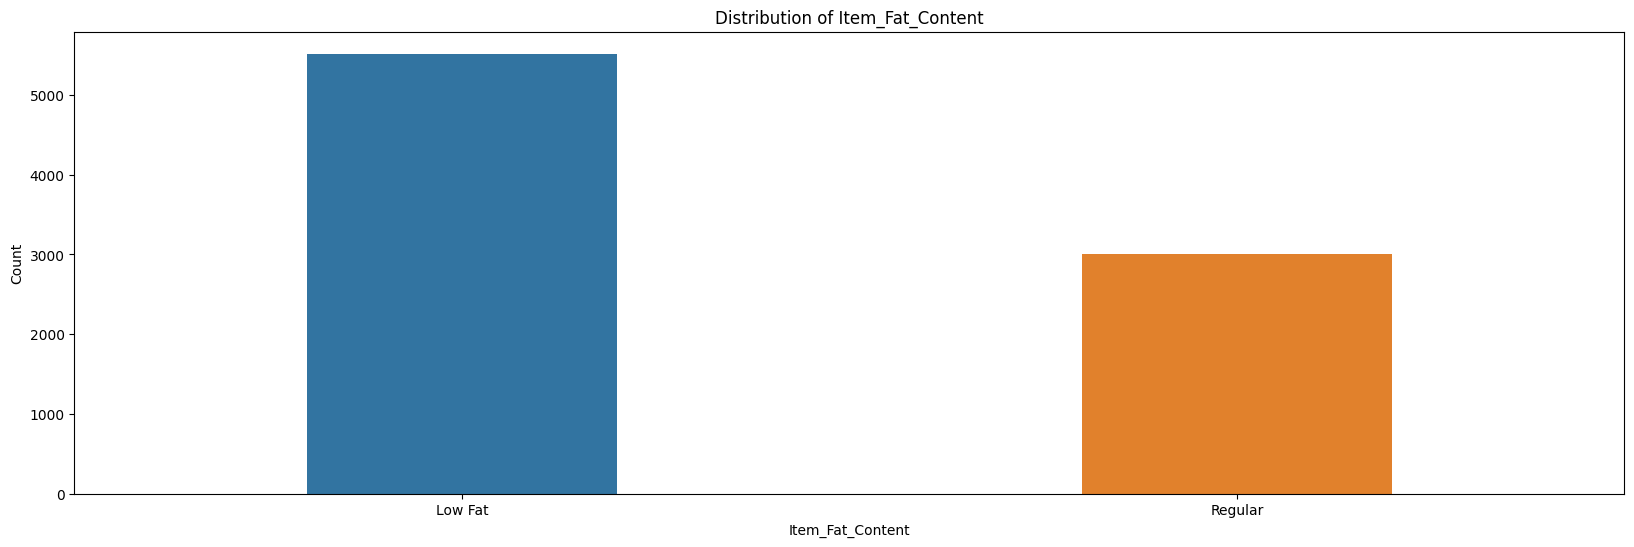

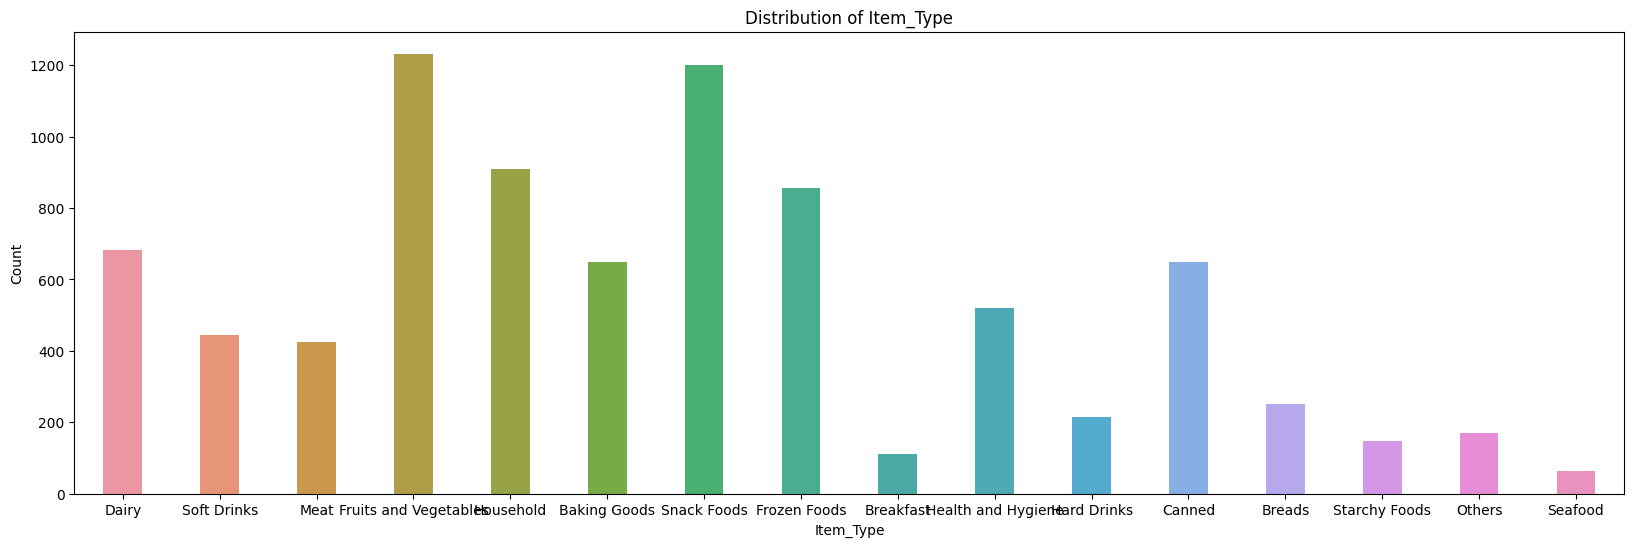

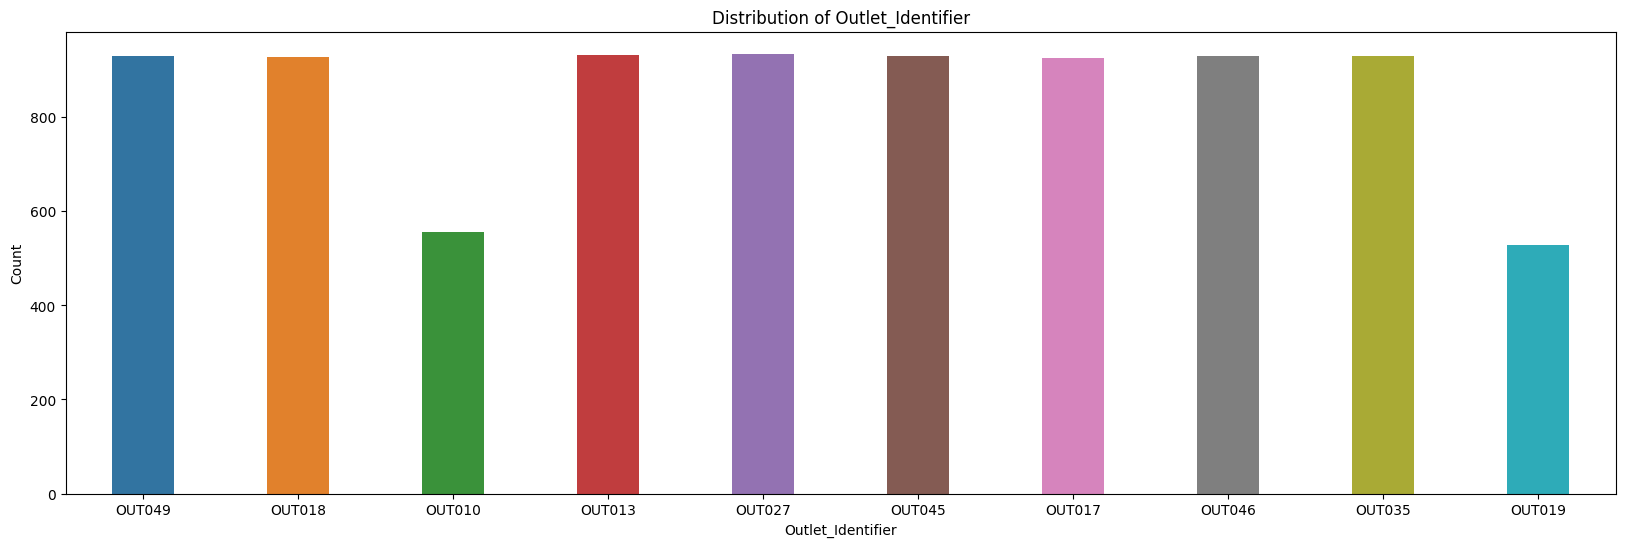

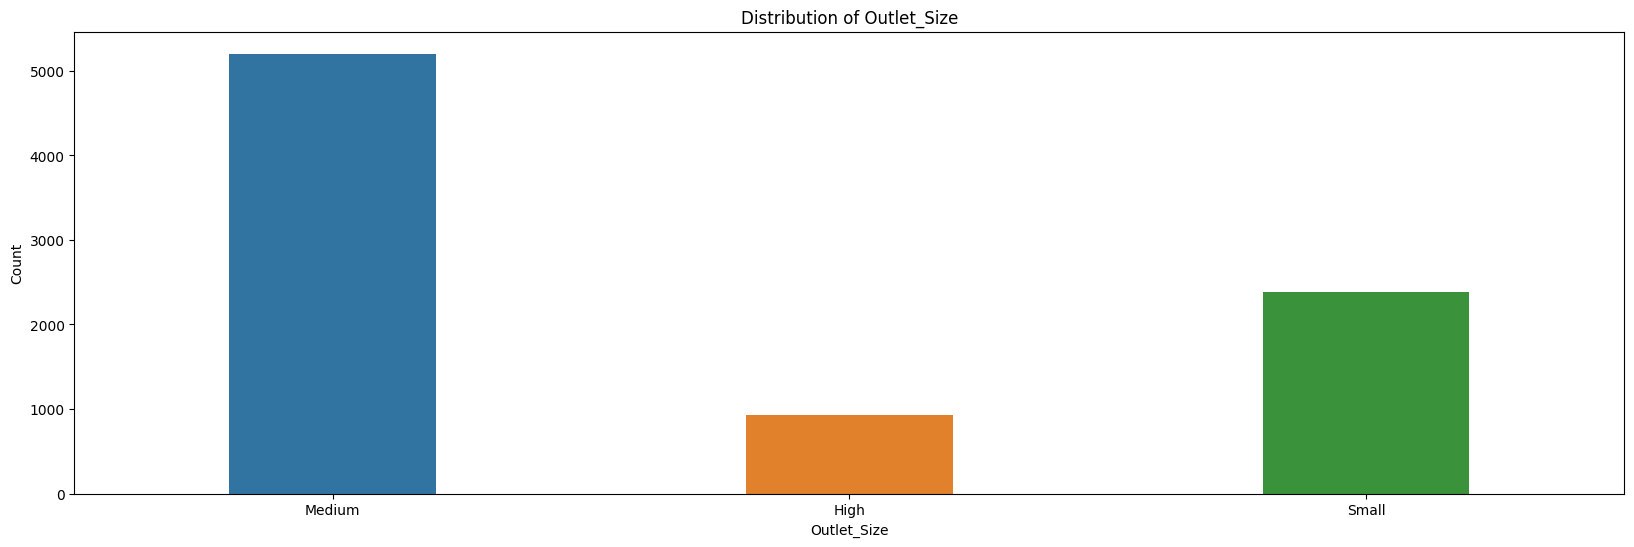

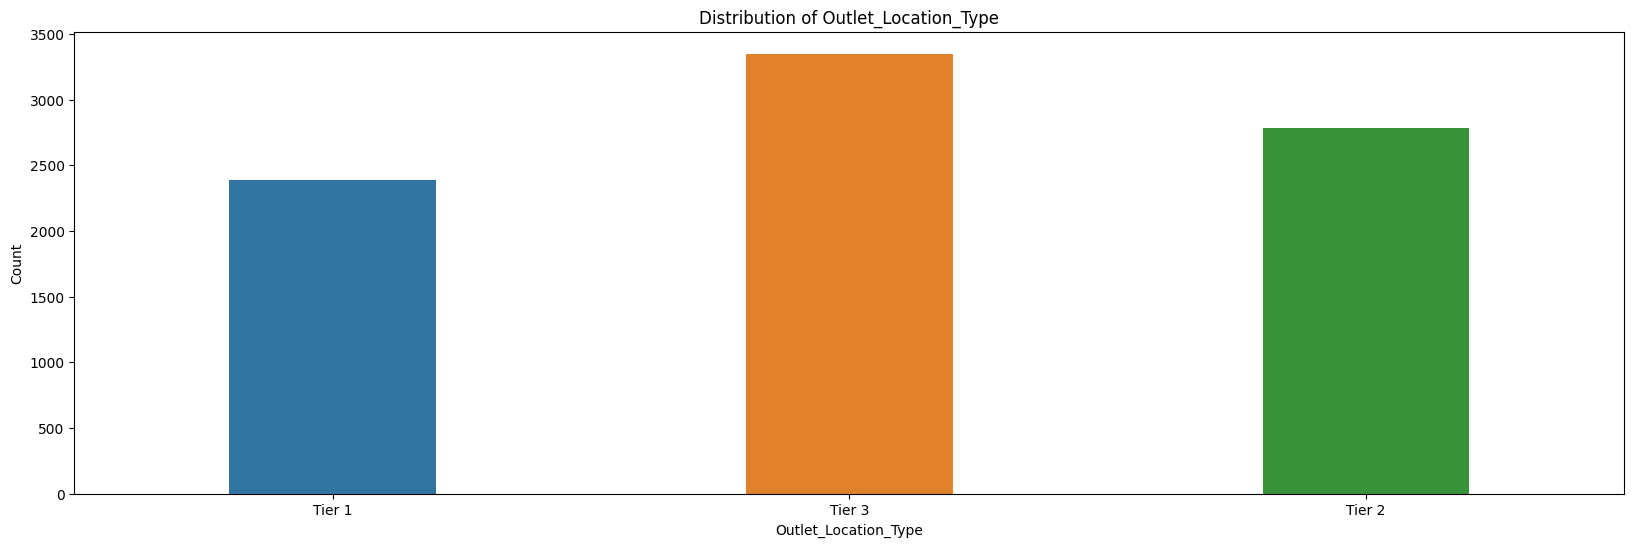

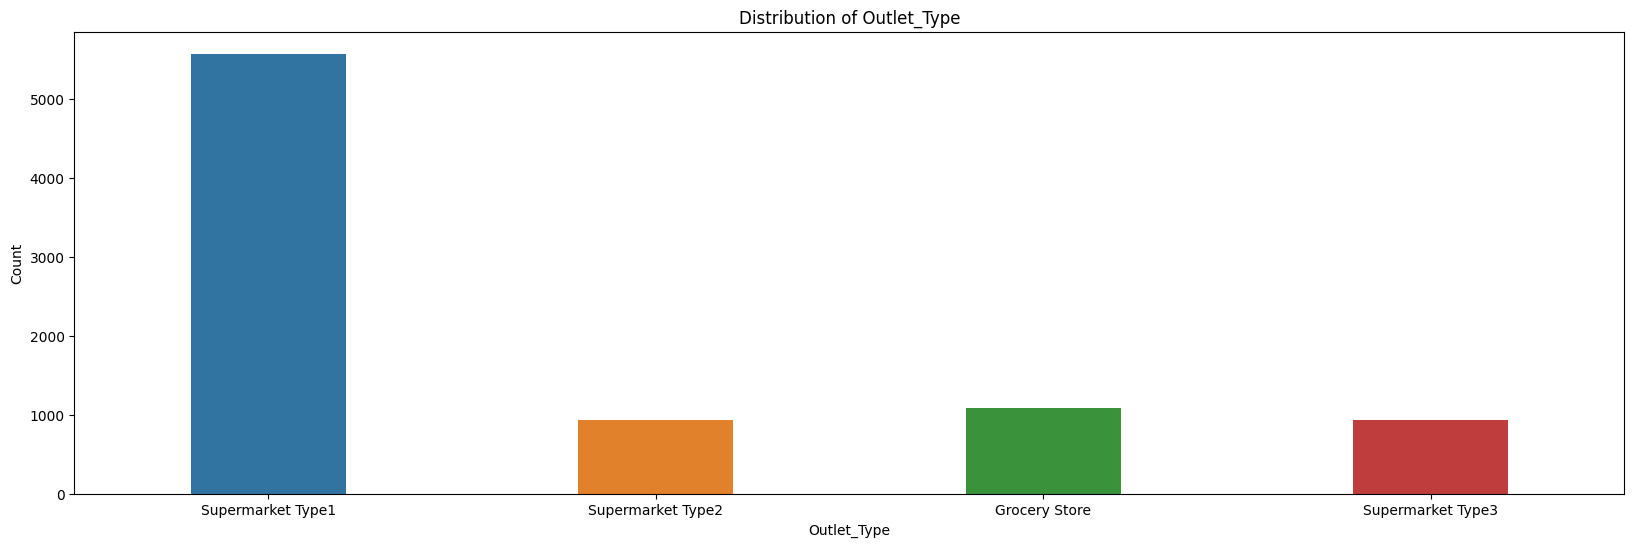

In [ ]:
# Assuming 'categorical_columns' your DataFrame containing categorical features

# Define the categorical features you want to create count plots for
categorical_features = categorical_columns.columns

# Loop through each categorical feature and create individual count plots
for feature in categorical_features:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=feature, data=categorical_columns, width = 0.4)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.show()


# Insights from categorical column

* `Item_Fat_Content` - Most items sold are low fat.
* `Item_Type` - Item types that are distictly popular are `fruits and vegetables` and `snack foods`.
* `Outlet_Size` - Bigmart outlets are mostly medium sized in our data.
* `Outlet_Location_Type` - The most common type is `Tier3`.
* `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.






# Bivariate Analysis

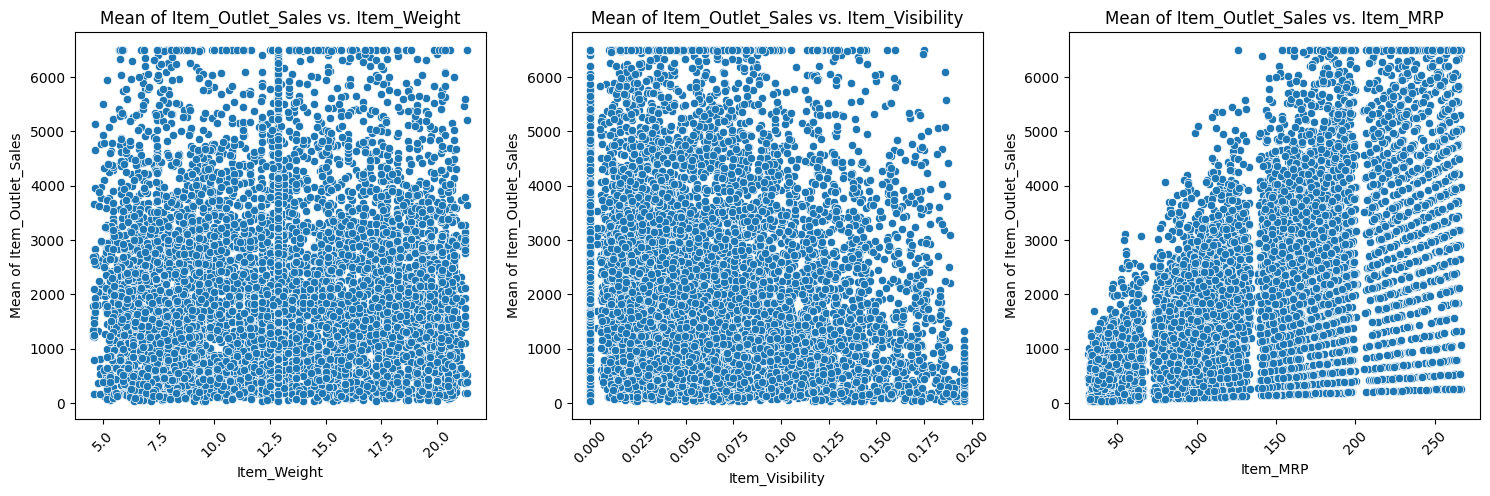

In [ ]:
# Define the features you want to create scatter plots for
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Loop through each feature and create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='Item_Outlet_Sales', data=train_data, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Mean of Item_Outlet_Sales')
    axes[i].set_title(f'Mean of Item_Outlet_Sales vs. {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Insights from numerical columns relation with the outlet sales

*  `Item_Weight`->  widely scattered data points indicates that there is no strong linear relationship.
*  `Item_MRP`-> The positive relationship suggests that consumers may be less price-sensitive for products with higher MRP values.










# Categorical features with target

In [ ]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

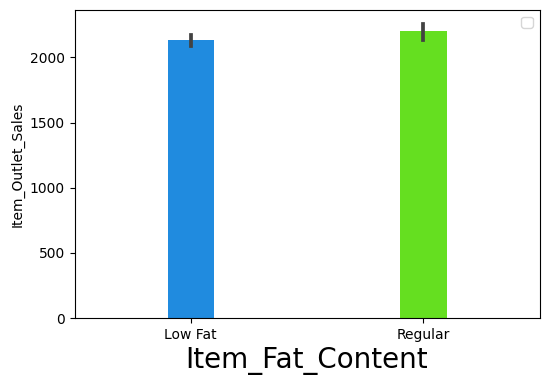

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Item_Fat_Content' ,y='Item_Outlet_Sales', data=train_data ,palette='gist_rainbow_r', width = 0.2)
plt.xlabel('Item_Fat_Content', fontsize=20)
plt.legend()
plt.show()

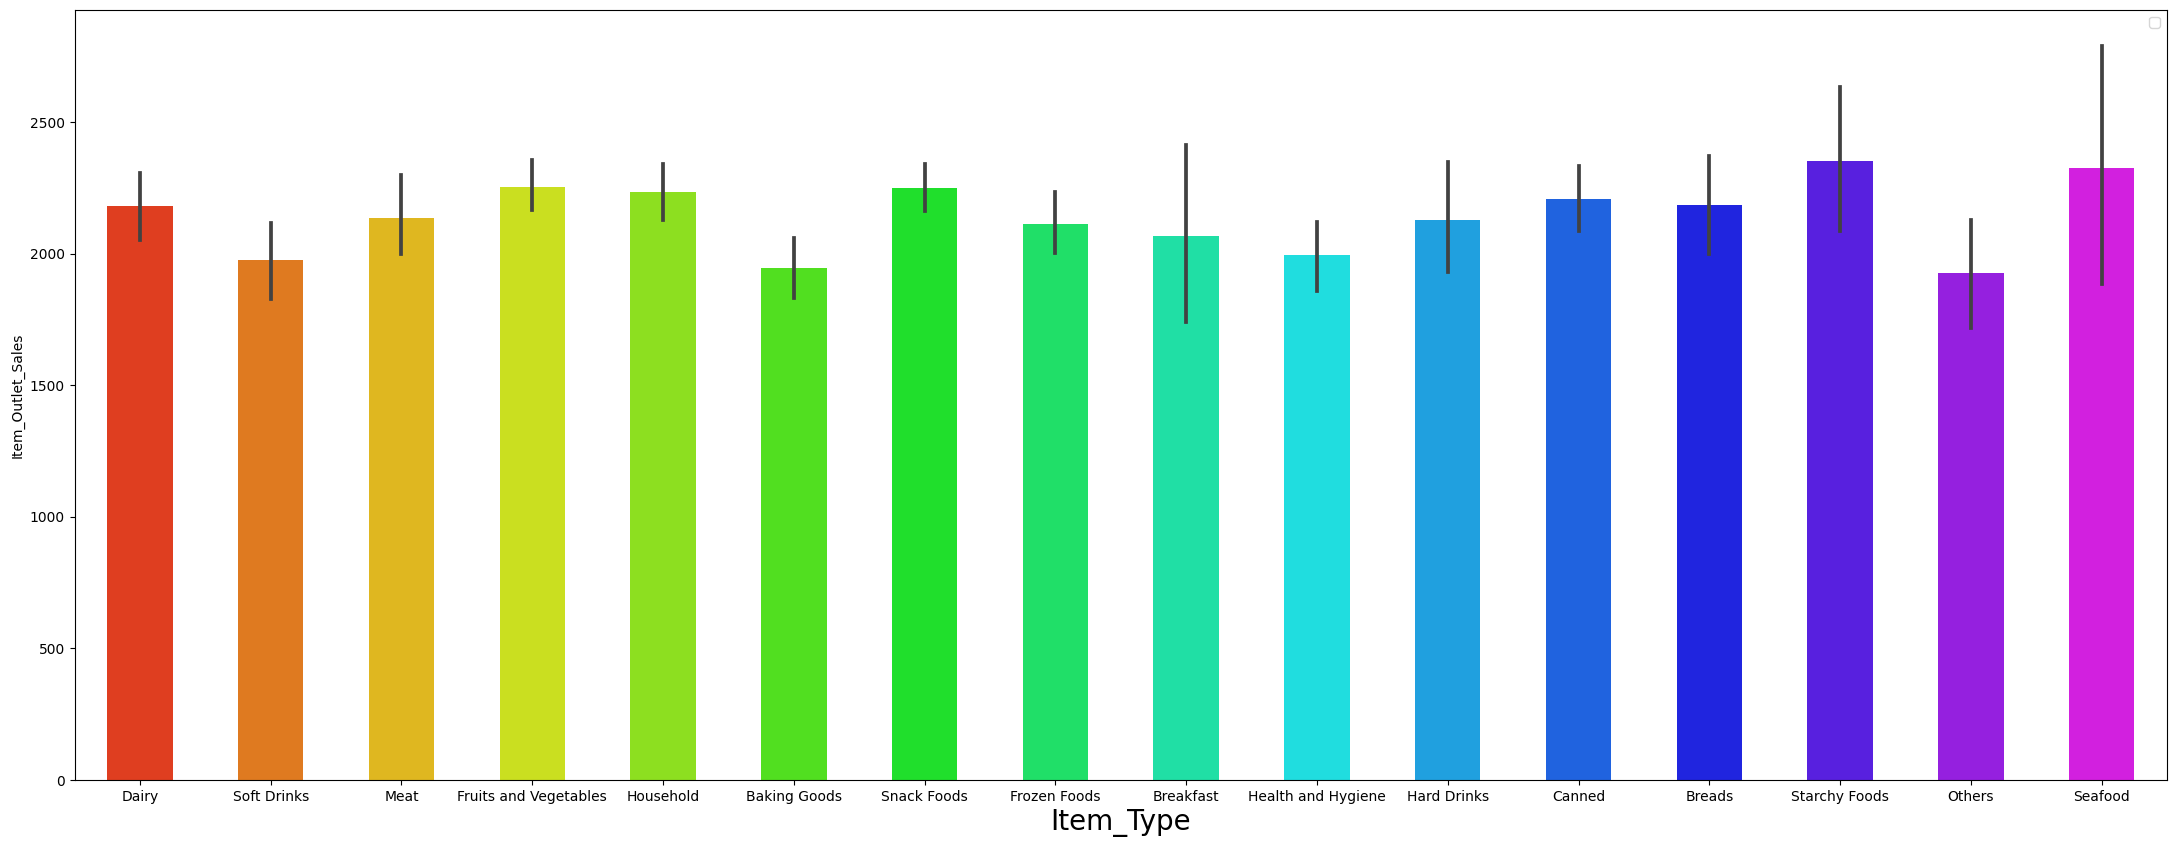

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=train_data ,palette='gist_rainbow', width = 0.5)
plt.xlabel('Item_Type', fontsize=20)
plt.legend()
plt.show()

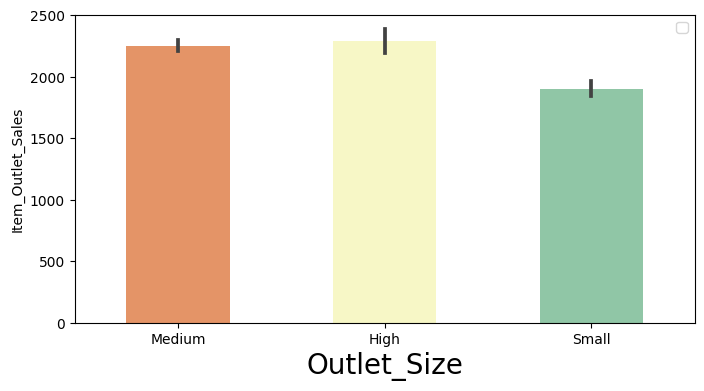

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=train_data ,palette='Spectral', width = 0.5)
plt.xlabel('Outlet_Size', fontsize=20)
plt.legend()
plt.show()

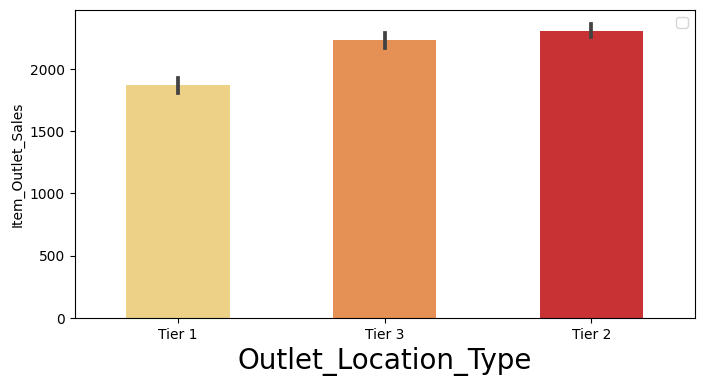

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=train_data ,palette='YlOrRd', width = 0.5)
plt.xlabel('Outlet_Location_Type', fontsize=20)
plt.legend()
plt.show()

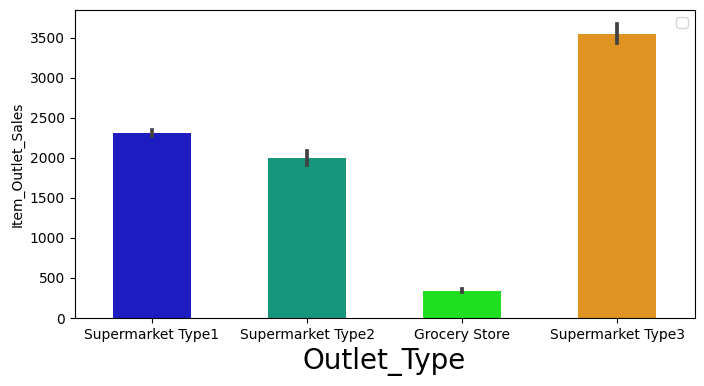

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=train_data ,palette='nipy_spectral', width = 0.5)
plt.xlabel('Outlet_Type', fontsize=20)
plt.legend()
plt.show()

# Insights

*  The Supermarket Type 3 has the highest average sales compared to other store types
*   Tier 2' and 'Tier 3' have higher average sales compared to other location types. Notably, 'Tier 2' locations have slightly higher average sales than 'Tier 3' locations, suggesting that 'Tier 2' locations may be more profitable in terms of generating sales."

*  The average sales for different item types are relatively consistent, indicating that item type does not have a major impact on sales performance."
*   "Upon analyzing the dataset, a noteworthy finding is that stores classified as 'Medium' and 'High' sizes exhibit significantly better sales performance compared to stores with other





# Feature Engineering




From EDA we can observe that same feaures does not have a major impact on sales performace se we can simply drop them.

*   Item_Identifier
*  Outlet_Identifier
*  Outlet_Age

Then we have 5 categorical columns we need to encode them

**Ordinal features**:
  
Outlet_Type,
Outlet_size,
Outlet_Location_Type

**Nominal features**:
Item_Fat_Content,
Item_Type






In [ ]:
test_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58    20.750000          Low Fat         0.007565  Snack Foods   
1           FDW14     8.300000          Regular         0.038428        Dairy   
2           NCN55    14.600000          Low Fat         0.099575       Others   
3           FDQ58     7.315000          Low Fat         0.015388  Snack Foods   
4           FDY38    12.695633          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0  107.8622            OUT049      Medium               Tier 1   
1   87.3198            OUT017      Medium               Tier 2   
2  241.7538            OUT010      Medium               Tier 3   
3  155.0340            OUT017      Medium               Tier 2   
4  234.2300            OUT027      Medium               Tier 3   

         Outlet_Type  Outlet_Age  
0  Supermarket Type1          14  
1  Supermarket Type1           6  
2      Grocery Store          15  
3  Supermarket Type1           6  
4  Supermarket Type3          28

In [ ]:
columns_to_drop = ['Item_Identifier', 'Outlet_Identifier', 'Outlet_Age', ]
train_data = train_data.drop(columns=columns_to_drop, axis=1)
test_data=test_data.drop(columns=columns_to_drop, axis=1)

# Encoding

In [ ]:
# Lable encoding

le = LabelEncoder()
Label = ['Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in Label:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])

train_data.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0  249.8092            1                     0            1          3735.1380  
1   48.2692            1                     2            2           443.4228  
2  141.6180            1                     0            1          2097.2700  
3  182.0950            1                     2            0           732.3800  
4   53.8614            0                     2            1           994.7052

In [ ]:
# Specify the columns to one-hot encode
columns_to_encode = ['Item_Fat_Content', 'Item_Type']

train_data = pd.get_dummies(train_data, columns=columns_to_encode, prefix=columns_to_encode)
test_data = pd.get_dummies(test_data, columns=columns_to_encode, prefix=columns_to_encode)

In [ ]:
train_data.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Size  Outlet_Location_Type  \
0         9.30         0.016047  249.8092            1                     0   
1         5.92         0.019278   48.2692            1                     2   
2        17.50         0.016760  141.6180            1                     0   
3        19.20         0.000000  182.0950            1                     2   
4         8.93         0.000000   53.8614            0                     2   

   Outlet_Type  Item_Outlet_Sales  Item_Fat_Content_Low Fat  \
0            1          3735.1380                         1   
1            2           443.4228                         0   
2            1          2097.2700                         1   
3            0           732.3800                         0   
4            1           994.7052                         1   

   Item_Fat_Content_Regular  Item_Type_Baking Goods  ...  \
0                         0                       0  ...   
1                         1                       0  ...   
2                         0                       0  ...   
3                         1                       0  ...   
4                         0                       0  ...   

   Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                1                      0   
4                                0                      0   

   Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                             0                    0               0   
1                             0                    0               0   
2                             0                    0               1   
3                             0                    0               0   
4                             0                    1               0   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0                 0                  0                      0   
1                 0                  0                      0   
2                 0                  0                      0   
3                 0                  0                      0   
4                 0                  0                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  
0                      0                        0  
1                      1                        0  
2                      0                        0  
3                      0                        0  
4                      0                        0  

[5 rows x 25 columns]

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the  data into features (X) and the target variable (y)
X = train_data.drop(['Item_Outlet_Sales'], axis=1)
y = train_data['Item_Outlet_Sales']

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train contain the training data and labels.
# X_test and y_test contain the testing data and labels.


In [ ]:
X_train.shape

(6818, 24)

In [ ]:
X_test.shape

(1705, 24)

# Model Training

# **Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 1173151.9798822
R-squared (R2) Score: 0.5314864079841


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2) Score: {r2_rf}")


Random Forest Mean Squared Error (MSE): 1089566.8115225045
Random Forest R-squared (R2) Score: 0.5648672385491107


# **XGBoost**

In [ ]:
import xgboost as xgb


# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2) Score: {r2_xgb}")


XGBoost Mean Squared Error (MSE): 1002259.1259846474
XGBoost R-squared (R2) Score: 0.5997347050525075


**Hyper Parameter Tuning XGB And GBR**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],        # Learning rate
    'max_depth': [3, 4, 5],                   # Maximum tree depth
    'min_child_weight': [1, 2, 3]             # Minimum sum of instance weight needed in a child
}

# Create GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search.best_params_

# Create a new XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_params_xgb)

# Train the best model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb = r2_score(y_test, y_pred_xgb_best)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2) Score: {r2_xgb}")



**Feature selection**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Select the top features based on importance scores
selected_features = X_train.columns[feature_importances.argsort()[-5:][::-1]]


In [ ]:
selected_features

Index(['Item_MRP', 'Outlet_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Location_Type'],
      dtype='object')

In [ ]:
X = train_data[selected_features]
y = train_data['Item_Outlet_Sales']

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2) Score: {r2_xgb}")

XGBoost Mean Squared Error (MSE): 991728.4734350953
XGBoost R-squared (R2) Score: 0.6039402589252099
